In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.io as sio
import cv2
import matplotlib.image as mpimg
from matplotlib import path

In [3]:
dirdata = 'D:/44754/Documents/robotics/Perception/RoboticsPerceptionWeek4AssignmentCode/data.mat'
data = sio.loadmat(dirdata)['data']
print(data.shape)

(1, 1)


In [81]:
x1 = data['x1'][0][0]; x2 = data['x2'][0][0]
x3 = data['x3'][0][0]; K = data['K'][0][0]
C = data['C'][0][0]; R = data['R'][0][0]
img1 = data['img1'][0][0].astype(np.uint8)
img2 = data['img2'][0][0].astype(np.uint8)
img3 = data['img3'][0][0].astype(np.uint8)

In [43]:
F, mask = cv2.findFundamentalMat(x1,x2,cv2.FM_LMEDS)

In [44]:
F

array([[ 1.19586920e-07,  6.74009099e-06, -4.04513821e-03],
       [-5.11794316e-06, -6.15510087e-08, -2.58691694e-03],
       [ 3.01361581e-03,  8.95094934e-04,  1.00000000e+00]])

In [49]:
# We select only inlier points
pts1 = x1[mask.ravel()==1].astype(int)
pts2 = x2[mask.ravel()==1].astype(int)

In [84]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c,_ = img1.shape
    img1 = cv2.cvtColor(img1.astype(np.uint8),cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2.astype(np.uint8),cv2.COLOR_BGR2GRAY)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

(-0.5, 1279.5, 959.5, -0.5)

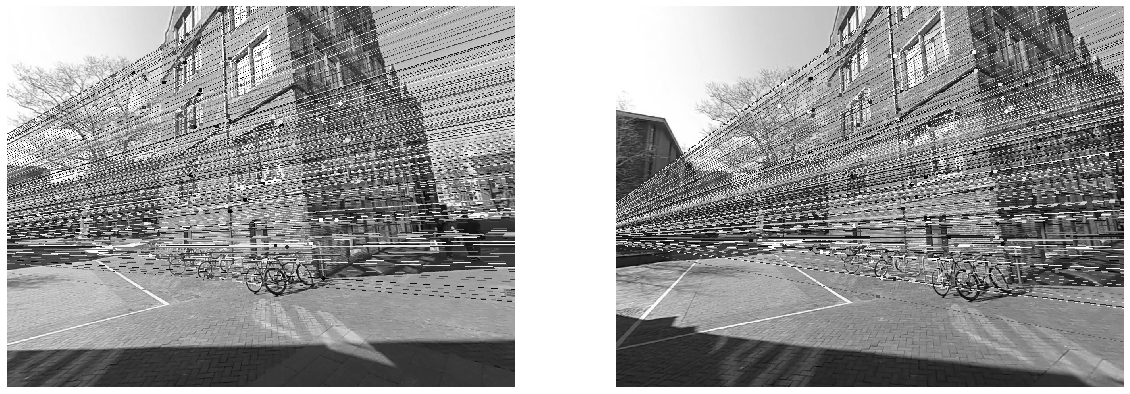

In [92]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)

plt.figure(figsize=(20,10)); plt.set_cmap('gray');
plt.subplot(121);plt.imshow(img5);  plt.axis('off')
plt.subplot(122);plt.imshow(img3); plt.axis('off')
